In [1]:
# importing libraries
import pandas as pd 
import pickle

# importing all datasets 
data = pd.read_csv('ipl.csv')
venues = pd.read_csv('venue.csv')

pd.pandas.set_option('display.max_columns', None)

In [2]:
# Checking the Dataset
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# Removing unwanted columns
columns_to_remove = ['mid', 'striker', 'non-striker', 'batsman','bowler']
data.drop(labels=columns_to_remove, axis=1, inplace=True)

In [4]:
data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [5]:
# checking all the IPl Teams 
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
# Only selected Playing IPL Teams (Based on 2019)
playing_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                 'Mumbai Indians','Kings XI Punjab', 'Royal Challengers Bangalore',
                 'Delhi Daredevils','Sunrisers Hyderabad']

In [7]:
data = data[(data['bat_team'].isin(playing_teams)) & (data['bowl_team'].isin(playing_teams))]

In [8]:
print(data.shape)
data.head()

(53811, 10)


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
# Removing the Powerplay overs data in every match
data = data[data['overs']>6.0]

In [10]:
print(data.shape)
data.head()

(37371, 10)


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [11]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [12]:
# Checking all the venue names
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [13]:
# Only selected Playing IPL Venues (Based on 2019, 2020)
playing_venues = ['M Chinnaswamy Stadium','Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
                  'Wankhede Stadium','MA Chidambaram Stadium, Chepauk', 'Eden Gardens'
                  ,'Rajiv Gandhi International Stadium, Uppal','Sawai Mansingh Stadium','Sharjah Cricket Stadium',
                  'Dubai International Cricket Stadium','Sheikh Zayed Stadium']

In [14]:
data = data[(data['venue'].isin(playing_venues))]

In [15]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sheikh Zayed Stadium', 'Sharjah Cricket Stadium',
       'Dubai International Cricket Stadium'], dtype=object)

In [16]:
# venue dataset 
# venue average is based on 2019, 2020 IPL
venues

,venue,venue_avg1st_score
0,M Chinnaswamy Stadium,163.000
1,"Punjab Cricket Association Stadium, Mohali",171.000
2,Feroz Shah Kotla,156.286
3,Wankhede Stadium,176.143
4,Sawai Mansingh Stadium,163.429
5,"MA Chidambaram Stadium, Chepauk",144.125
6,Eden Gardens,194.000
7,"Rajiv Gandhi International Stadium, Uppal",171.500
8,Sheikh Zayed Stadium,162.500
9,Sharjah Cricket Stadium,177.500


In [17]:
# merging two datasets
data = data.merge(venues,left_on='venue',right_on='venue')

In [18]:
print(data.shape)
data.head()

(28344, 11)


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_avg1st_score
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222,163.0
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222,163.0
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222,163.0
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222,163.0
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222,163.0


In [19]:
# Converted Categorical features using onehotencoding 
data = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team','venue'],drop_first=True)

In [20]:
print(data.shape)
data.head()

(28344, 32)


,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_avg1st_score,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Wankhede Stadium
0,2008-04-18,62,1,6.1,55,1,222,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,2008-04-18,63,1,6.2,52,1,222,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2008-04-18,64,1,6.3,47,1,222,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,2008-04-18,66,1,6.4,45,1,222,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,2008-04-18,67,1,6.5,46,1,222,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [21]:
data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_avg1st_score', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Sharjah Cricket Stadium',
       'venue_Sheikh Zayed Stadium', 'venue_Wankhede Stadium'],
     

In [22]:
### Rearranging all Columns
data = data[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
              'venue_avg1st_score', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Sharjah Cricket Stadium',
       'venue_Sheikh Zayed Stadium', 'venue_Wankhede Stadium','total']]

In [23]:
print(data.shape)
data.head()

(28344, 32)


,date,runs,wickets,overs,runs_last_5,wickets_last_5,venue_avg1st_score,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Wankhede Stadium,total
0,2008-04-18,62,1,6.1,55,1,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,222
1,2008-04-18,63,1,6.2,52,1,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,222
2,2008-04-18,64,1,6.3,47,1,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,222
3,2008-04-18,66,1,6.4,45,1,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,222
4,2008-04-18,67,1,6.5,46,1,163.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,222


In [24]:
# Independent and Dependent Variables
x = data.drop(labels='total', axis=1)
y = data['date']

In [25]:
#splitting into training and testing datasets
x_train = data.drop(labels='total', axis=1)[data['date'].dt.year <= 2016]
x_test = data.drop(labels='total', axis=1)[data['date'].dt.year >= 2017]

In [26]:
y_train = data[data['date'].dt.year <= 2016]['total'].values
y_test = data[data['date'].dt.year >= 2017]['total'].values

In [27]:
#Droping date from datases( date is unwanted )
x_train = x_train.drop(labels='date', axis=1)
x_test = x_test.drop(labels='date', axis=1)

In [28]:
### Checking Dtypes
x_train.dtypes

runs                                                  int64
wickets                                               int64
overs                                               float64
runs_last_5                                           int64
wickets_last_5                                        int64
venue_avg1st_score                                  float64
bat_team_Delhi Daredevils                             uint8
bat_team_Kings XI Punjab                              uint8
bat_team_Kolkata Knight Riders                        uint8
bat_team_Mumbai Indians                               uint8
bat_team_Rajasthan Royals                             uint8
bat_team_Royal Challengers Bangalore                  uint8
bat_team_Sunrisers Hyderabad                          uint8
bowl_team_Delhi Daredevils                            uint8
bowl_team_Kings XI Punjab                             uint8
bowl_team_Kolkata Knight Riders                       uint8
bowl_team_Mumbai Indians                

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
prediction = regressor.predict(x_test)

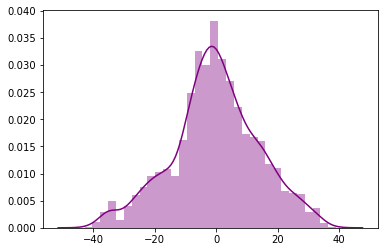

In [31]:
import seaborn as sns
sns.distplot(y_test-prediction,color='purple')

In [32]:
import numpy as np
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test,prediction))
print("MSE : {}".format(metrics.mean_squared_error(y_test,prediction)))
print("MAE : {}".format(metrics.mean_absolute_error(y_test,prediction)))
print("RMSE : {}".format(RMSE))

MSE : 201.14534285595516
MAE : 10.966435362468946
RMSE : 14.18257179978142


# Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameter = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,60,100]}
regressor = GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
regressor.fit(x_train,y_train)

/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.38926e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.53969e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82791e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20408e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarn

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 60, 100]},
             scoring='neg_mean_squared_error')

In [34]:
print(regressor.best_params_)
print(regressor.best_score_)

{'alpha': 100}
-353.7195991672247


In [35]:
ridge_predict=regressor.predict(x_test)

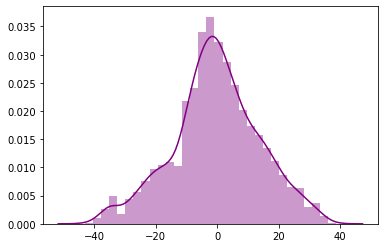

In [36]:
import seaborn as sns
sns.distplot(y_test-ridge_predict,color='purple')

In [37]:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,ridge_predict))
print("MSE : {}".format(metrics.mean_squared_error(y_test,ridge_predict)))
print("MAE : {}".format(metrics.mean_absolute_error(y_test,ridge_predict)))
print("RMSE : {}".format(RMSE))

MSE : 199.72684858585788
MAE : 10.944795692207943
RMSE : 14.132474963213552


# Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameter = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,60,100]}
las_regressor = GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
las_regressor.fit(x_train,y_train)

/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2630337.991367716, tolerance: 1890.0190990639949
  model = cd_fast.enet_coordinate_descent(
/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2827215.862354625, tolerance: 1866.9904821919756
  model = cd_fast.enet_coordinate_descent(
/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2912365.045634323, tolerance: 1994.8481366714411
  model = cd_fast.enet_coordinate_descent(
/Users/srinivas/opt/anaconda3/lib/python3.8/site-packages/skl

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 60, 100]},
             scoring='neg_mean_squared_error')

In [39]:
print(las_regressor.best_params_)
print(las_regressor.best_score_)

{'alpha': 1}
-312.15696522083897


In [40]:
las_predict=las_regressor.predict(x_test)

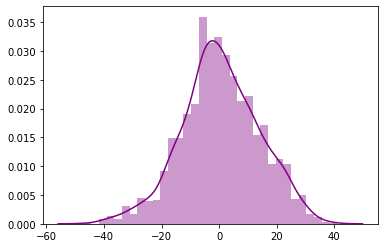

In [41]:
import seaborn as sns
sns.distplot(y_test-las_predict,color='purple')

In [42]:
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test,las_predict))
print("MSE : {}".format(metrics.mean_squared_error(y_test,las_predict)))
print("MAE : {}".format(metrics.mean_absolute_error(y_test,las_predict)))
print("RMSE : {}".format(RMSE))

MSE : 182.6324814847978
MAE : 10.632179591469042
RMSE : 13.514158556299309


In [ ]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lasso-model.pkl'
pickle.dump(las_regressor, open(filename, 'wb'))